<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">

<p>در ASP.NET Core، زمانی که از متدهای <code>Add*</code> برای ثبت سرویس‌ها در container وابستگی (Dependency Injection Container) استفاده می‌کنید، این متدها به صورت جنریک (generics) برای مشخص کردن نوع کلاس استفاده می‌شوند، اما نحوه ساختن نمونه‌ای از آن کلاس را مشخص نمی‌کنند. در عوض، container وابستگی چند فرضیه را در مورد کلاس‌ها و سازنده‌های آن‌ها دارد که باید به آن‌ها پایبند باشید. بیایید این فرضیه‌ها را توضیح دهیم:</p>

<ul>
<li>
<p><strong>کلاس باید یک نوع ملموس (Concrete Type) باشد</strong>:</p>
<p>نوعی که ثبت می‌کنید باید یک کلاس ملموس باشد نه یک کلاس انتزاعی (abstract class) یا یک اینترفیس. </p>
</li>

<li>
<p><strong>کلاس باید فقط یک سازنده معتبر داشته باشد</strong>:</p>
<ul><li>کلاسی که می‌خواهید از آن نمونه‌سازی کنید باید تنها یک سازنده (constructor) داشته باشد که container بتواند از آن استفاده کند. اگر کلاس دارای چندین سازنده باشد، container ممکن است نتواند تصمیم بگیرد که کدام سازنده را باید استفاده کند.</li></ul>
</li>
<li>
<p><strong>برای اینکه یک سازنده معتبر باشد، تمامی آرگومان‌های آن باید ثبت شده باشند یا دارای مقدار پیش‌فرض باشند</strong>:</p>
<p>سازنده‌ای که container برای نمونه‌سازی از کلاس استفاده می‌کند، باید تمامی پارامترهای آن یا در container ثبت شده باشند و یا دارای مقدار پیش‌فرض باشند. به عبارت دیگر، container باید بتواند تمامی وابستگی‌ها را فراهم کند یا از مقادیر پیش‌فرض استفاده کند.</p>
</li>
</ul>


</div>

In [ ]:
public record EmailServerSettings(string Host, int Port);

You can’t register these `primitive types` in the container

In [ ]:
builder.Services.AddSingleton(
    new EmailServerSettings 
    ( 
        Host: "smtp.server.com", 
        Port: 25 
    ));

when you using the `AddSingleton<T>()` method, and the container will use `only one instance` ***throughout your application***.

if you want, you can ***provide a function*** that the `container invokes` when it needs an instance of the type

In [ ]:
builder.Services.AddScoped( 
    provider => 
        new EmailServerSettings 
        ( 
            Host: "smtp.server.com", 
            Port: 25 
        ));

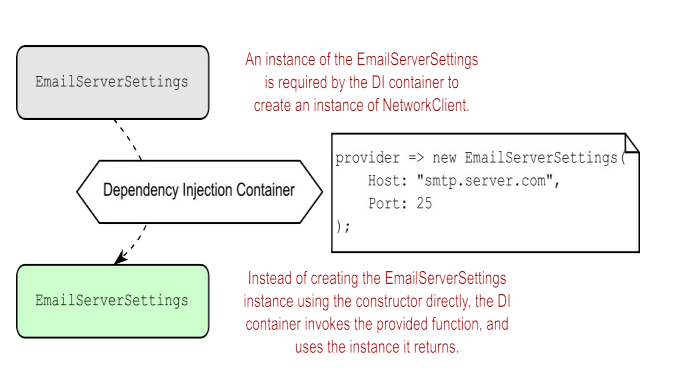

When you use a `lambda` to register your services, you’re given an
`IServiceProvider` instance at runtime, called `provider`

#### Open generics and dependency injection

`Open generics` are types that ***contain a generic type parameter***, such as
`Service <T>`.

In [ ]:
builder.Services.AddScoped(typeof(IService<>), typeof(Service<>);